In [ ]:
%pip install seaborn

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from PIL import Image

In [2]:
import numpy as np

In [3]:
import seaborn as sns
sns.set_theme()

In [3]:
first = open("slurm-3904272.out").readlines()
continuation = open("slurm-3957218.out").readlines()

In [4]:
from collections import defaultdict

In [5]:
elosses = defaultdict(list)

for l in first[:]:
    if not l.startswith("Epoch:"):
        continue
    if "Total time" in l:
        continue
    
    epoch = int(l.split("]")[0].split("[")[1].strip())
    iteration = int(l.split("[")[2].split("/")[0].strip())
    loss = float(l.split("loss:")[1].split("(")[0].strip())
    
    elosses[epoch].append(loss)
    
for l in continuation[:]:
    if not l.startswith("Epoch:"):
        continue
    if "Total time" in l:
        continue
    
    epoch = int(l.split("]")[0].split("[")[1].strip())
    iteration = int(l.split("[")[2].split("/")[0].strip())
    loss = float(l.split("loss:")[1].split("(")[0].strip())
    
    elosses[epoch].append(loss)

In [6]:
arr = np.array(Image.open("train_reconstructions/e1_i1001.png"))
imgs = []
padder = np.zeros(arr[59:427, 237:255].shape, dtype=int)
padder[:] = 0
for file in ["e0_i1001.png", "e37_i1001.png", "e74_i1001.png"]:
    file = "train_reconstructions/" + file
    arr = np.array(Image.open(file))
    imgs.append(arr[59:427, 237:420])
    imgs.append(padder)
    
predictions = np.concatenate(imgs[:-1], axis=1)

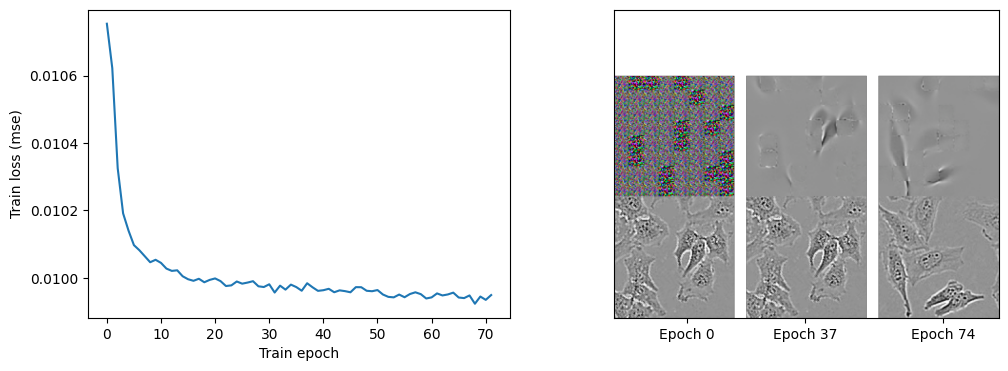

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax.flat[0].plot([sum(elosses[x]) / (len(elosses[x])+1) for x in list(elosses.keys())[1:-1]])
ax.flat[0].set_ylabel("Train loss (mse)")
ax.flat[0].set_xlabel("Train epoch")

n = 100
predictions = np.pad(predictions, ((n, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)
ax.flat[1].imshow(predictions)
ax.flat[1].get_yaxis().set_visible(False)
ax.flat[1].get_xaxis().set_visible(True)

ax.flat[1].set_xticks([110, 290, 500], ['Epoch 0', 'Epoch 37', 'Epoch 74'],
       rotation=0)
ax.flat[1].set_facecolor("white")
ax.flat[1].grid(False)


plt.savefig("pretrain4.pdf")

In [8]:
import os

In [26]:
arr = np.array(Image.open("train_reconstructions/e1_i1001.png"))
imgs = []
padder = np.zeros(arr[59:427, 237:255].shape, dtype=int)
padder[:] = 0
for file in sorted(os.listdir("train_reconstructions")):
    file = "train_reconstructions/" + file
    arr = np.array(Image.open(file))
    imgs.append(arr[59:427, 237:420])
    imgs.append(padder)
    
#predictions = np.concatenate(imgs[:-1], axis=1)

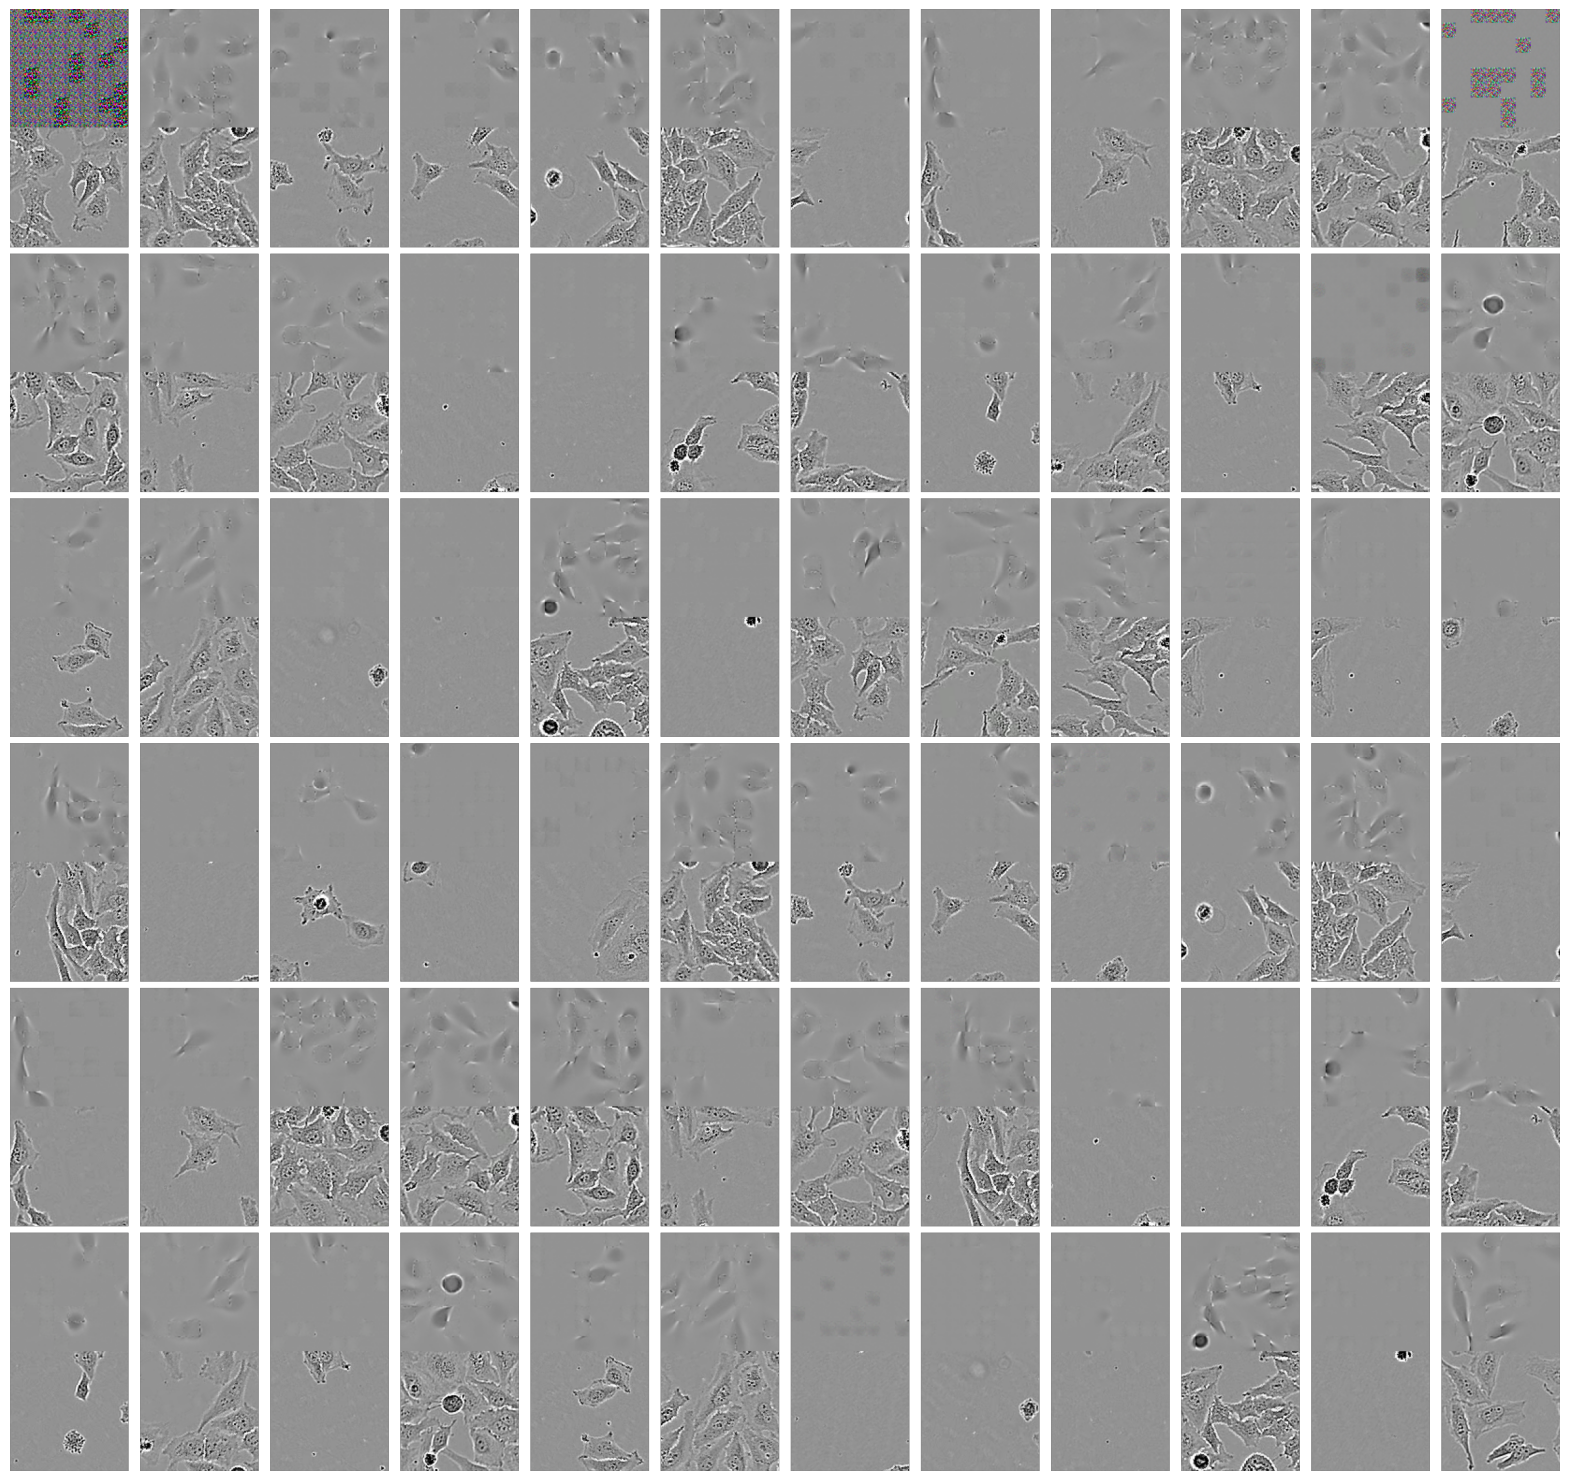

In [33]:
rows = []
for _ in range(6):
    conc = np.concatenate(imgs[_*24:_*24+24][:-1], axis=1)
    
    rows.append(conc)
    rows.append(np.zeros(conc.shape, dtype=int)[:10, :])

final = np.concatenate(rows[:-1], axis=0)

plt.figure(figsize = (20,20))
plt.imshow(final)
plt.axis("off");

plt.savefig("prelim.png")